In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import math

In [2]:
# First we will do EDA (Exploratory Data Analysis)
# Read the data points from the csv file using Pandas
dataset = pd.read_csv("D:\Gursimran\AIML\Datasets\Insurance data.csv")

In [3]:
# To read the first five rows of the dataset we will use head() function.
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# To read the last five rows of the dataset we will use tail() function.
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# We can also specify the row count of the dataset that we want to see; Suppose we want to see first 10 rows.
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
# we can see the statistics of the data by using the Describe() function.
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# we can see the number of entries in the dataset by using the shape function.
print(dataset.shape)

(1338, 7)


In [8]:
# To see all the columns and their descriptions, we can use the info() function.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# to find if the data has missing values.
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# to get the unique value counts , column - wise.
dataset.age.value_counts() 

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [12]:
dataset.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
# let's see the duplicate data present in our dataset.
duplicateData = dataset.duplicated()
print(duplicateData.sum())

1


In [15]:
# we have one duplicate record and hence we will drop that record.
dataset.drop_duplicates(inplace = True)

In [16]:
# Again, let's check the duplicate record count.
dataset.duplicated().sum()

0

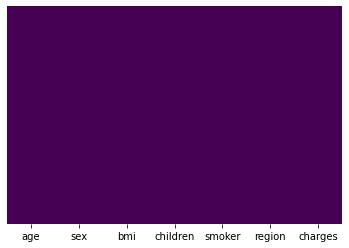

In [17]:
# we can check the missing values in our dataset by using the seaborn library.
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap='viridis')

# Visualizations

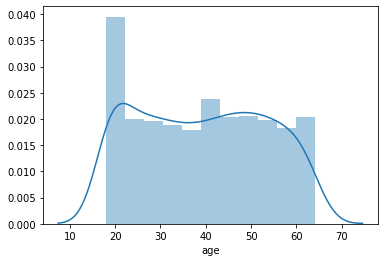

In [18]:
# distribution plot.
sns.distplot(dataset['age'])

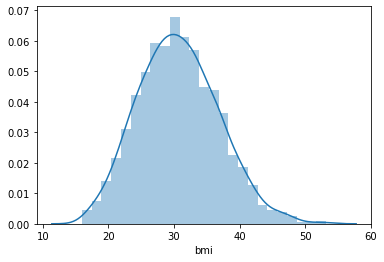

In [19]:
sns.distplot(dataset['bmi'])

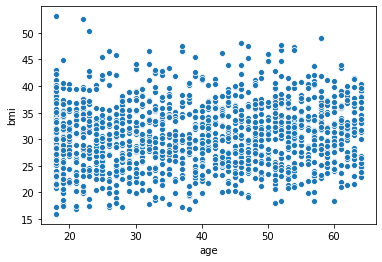

In [20]:
sns.scatterplot(dataset['age'],dataset['bmi'])

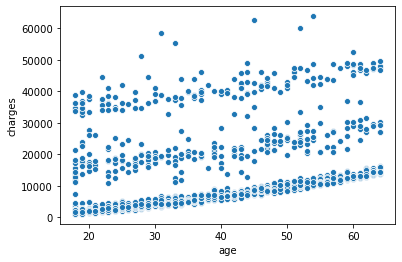

In [21]:
sns.scatterplot(dataset['age'],dataset['charges'])

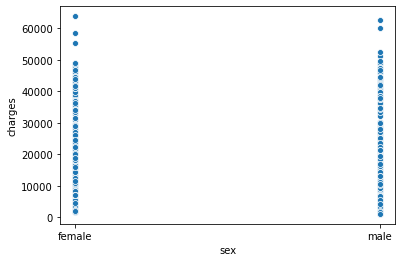

In [22]:
sns.scatterplot(dataset['sex'],dataset['charges'])

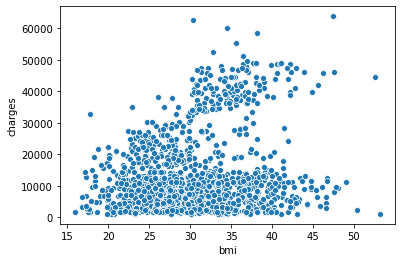

In [23]:
sns.scatterplot(dataset['bmi'],dataset['charges'])

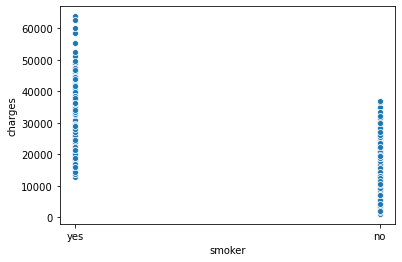

In [24]:
sns.scatterplot(dataset['smoker'],dataset['charges'])

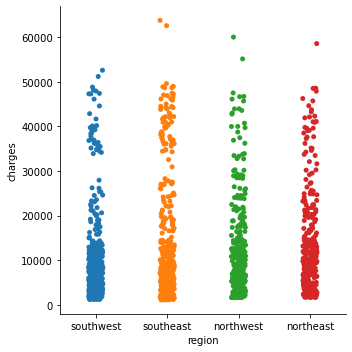

In [25]:
# let's see the category plot also.
sns.catplot(x = "region", y = "charges", data = dataset);

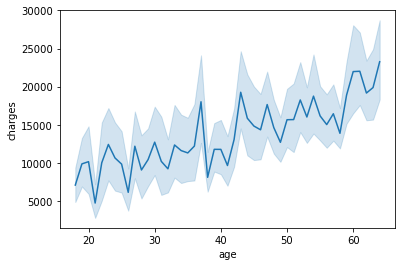

In [26]:
# let' see the lineplot also that is provided by the seaborn library.
sns.lineplot(x = "age", y = "charges", data = dataset);

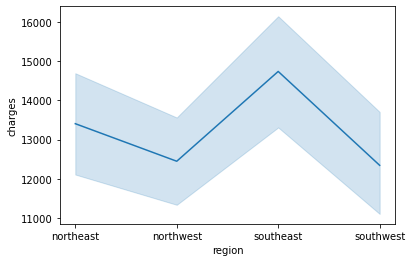

In [27]:
# as per the observations, we can conclude that if the age increases, charges increase.
sns.lineplot(x = "region", y = "charges", data = dataset);

# outliers

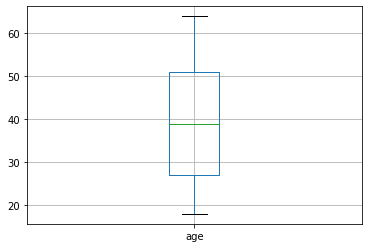

In [28]:
# let's see if there are outliers present in our dataset using the boxplot.
dataset.boxplot(column = ["age"])

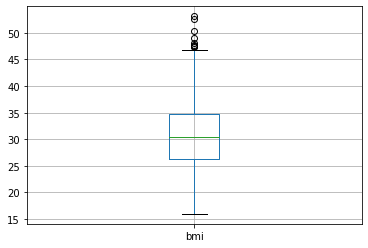

In [29]:
dataset.boxplot(column = ["bmi"])

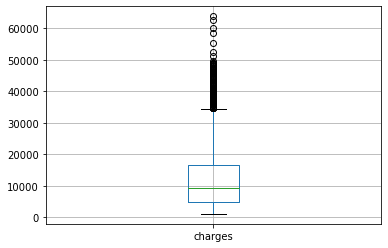

In [32]:
dataset.boxplot(column = ["charges"])

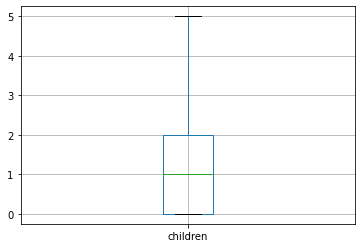

In [33]:
dataset.boxplot(column = ["children"])

In [34]:
# from the above conclusions, we can conclude that the outliers are present in the two columns.
# the "bmi" and "charges" column have outliers present in them. 
# let's clean our data and remove the outliers present.
# Let's define a function that will remove the outliers for getting threshold value from IQR.
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [35]:
lowerBmi, upperBmi = remove_outlier(dataset["bmi"])

In [37]:
# we will now remove the data points having the higher values than expected range.
dataset["bmi"] = np.where(dataset["bmi"] > upperBmi, upperBmi, dataset["bmi"])

# we will now remove the data points having the lower values than expected range.
dataset["bmi"] = np.where(dataset["bmi"] < lowerBmi, lowerBmi, dataset["bmi"])

In [38]:
# let's remove the outliers from the charges column.
lowerCharges, upperCharges = remove_outlier(dataset["charges"])

In [39]:
# we will now remove the data points having the higher values than expected range.
dataset["charges"] = np.where(dataset["charges"] > upperCharges, upperCharges, dataset["bmi"])

# we will now remove the data points having the lower values than expected range.
dataset["charges"] = np.where(dataset["charges"] < lowerCharges, lowerCharges, dataset["bmi"])

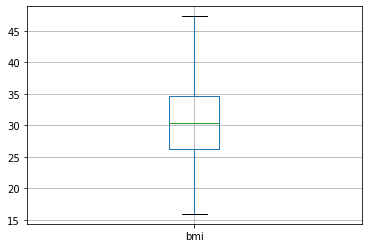

In [40]:
# let's again see the boxplot for both the columns and see if the outliers are present in them.
dataset.boxplot(column = ["bmi"])

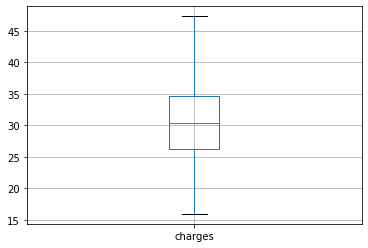

In [41]:
dataset.boxplot(column = ["charges"])

# Correlations

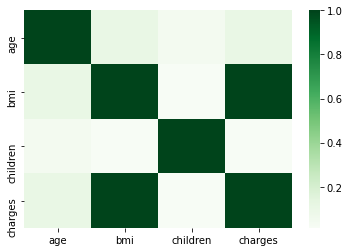

In [42]:
# Now, we will see the correlations.
sns.heatmap(dataset.corr(),cmap='Greens',annot=False)

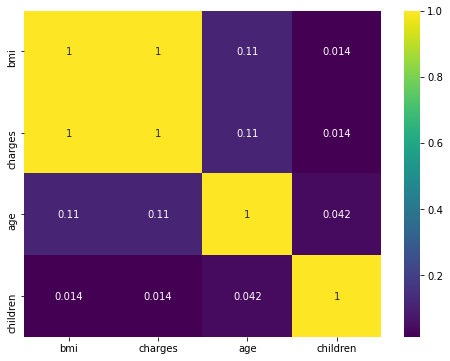

In [43]:
# positive correlation is represented by darker shades; Negative correlation is represented by lighter shades.
k = 12
cols = dataset.corr().nlargest(k, 'charges')['charges'].index
cm = dataset[cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

# Converting Categorical Data into the Numerical Values.

In [44]:
label_encoder = LabelEncoder()

In [45]:
dataset["sex"]  = label_encoder.fit_transform(dataset["sex"])

In [46]:
dataset["region"] = label_encoder.fit_transform(dataset["region"])

In [47]:
dataset["smoker"] = label_encoder.fit_transform(dataset["smoker"])

In [48]:
# let's see the data after the values have been converted to numerical values.
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,27.900
1,18,1,33.770,1,0,2,33.770
2,28,1,33.000,3,0,2,33.000
3,33,1,22.705,0,0,1,22.705
4,32,1,28.880,0,0,1,28.880


In [51]:
# let's scale the data.
scaler = StandardScaler()
column_names = dataset.columns

In [52]:
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = column_names)

In [53]:
# let's see the dataset again.
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,-1.009771,-0.454032,-0.909234,1.969660,1.343163,-0.454032
1,-1.511647,0.990324,0.515033,-0.079442,-0.507702,0.438017,0.515033
2,-0.799350,0.990324,0.387915,1.580143,-0.507702,0.438017,0.387915
3,-0.443201,0.990324,-1.311662,-0.909234,-0.507702,-0.467128,-1.311662
4,-0.514431,0.990324,-0.292246,-0.909234,-0.507702,-0.467128,-0.292246


In [55]:
features = ['age','sex','bmi','children','smoker','region']
x = dataset.loc[:,features]
y = dataset["charges"]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [57]:
# Let's find the linear regression using the sk-learn.
linear_regression = LinearRegression()

In [58]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [59]:
print("Coefficient is: ", linear_regression.coef_)
print("Intercept is: ", linear_regression.intercept_)

Coefficient is:  [ 8.08203456e-17 -1.09198611e-16  1.00000000e+00  1.48325182e-16
  4.09141100e-17  7.60502442e-17]
Intercept is:  -6.938893903907228e-18


In [61]:
# Use trained model to predict on test dataset
y_pred = linear_regression.predict(x_test)

# Visualization of result

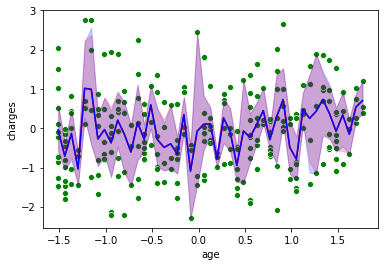

In [62]:
sns.scatterplot(x_test['age'], y_test, color='green')
sns.lineplot(x_test['age'], y_test, color='red')
sns.lineplot(x_test['age'], y_pred, color='blue')

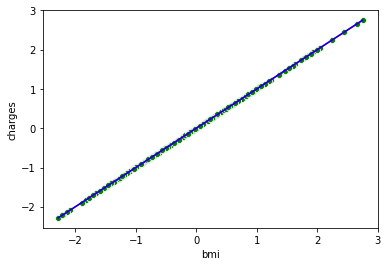

In [63]:
sns.scatterplot(x_test['bmi'], y_test, color='green')
sns.lineplot(x_test['bmi'], y_test, color='red')
sns.lineplot(x_test['bmi'], y_pred, color='blue')

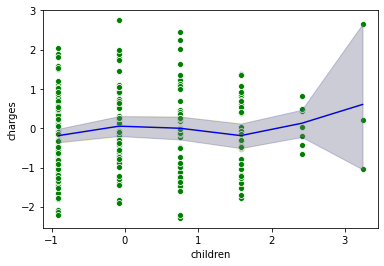

In [64]:
sns.scatterplot(x_test['children'], y_test, color='green')
sns.lineplot(x_test['children'], y_test, color='yellow')
sns.lineplot(x_test['children'], y_pred, color='blue')

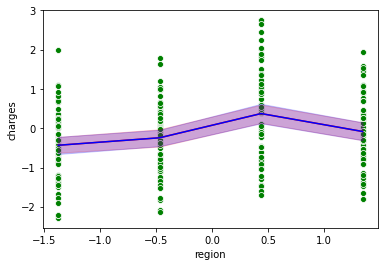

In [65]:
sns.scatterplot(x_test['region'], y_test, color='green')
sns.lineplot(x_test['region'], y_test, color='red')
sns.lineplot(x_test['region'], y_pred, color='blue')

In [67]:
rmse = mean_squared_error(y_test, y_pred)
rse = (rmse**2)*x.shape[0]
rse /= x.shape[0]-2
print("rmse : ", rmse)
print("rse : ", rse)
print("r2_score : ", linear_regression.score(x,y))

rmse :  2.643156327733713e-31
rse :  6.996741702985343e-62
r2_score :  1.0


In [68]:
# Linear Regression model using SGD(Stochastic Gradient Descent).
sgd = SGDRegressor(max_iter = 10_000, tol = 0.001, eta0 = 1e-3)
sgd.fit(x_train, y_train)

SGDRegressor(eta0=0.001, max_iter=10000)

In [69]:
print("Coefficient is: ", sgd.coef_)
print("Intercept is: ", sgd.intercept_)

Coefficient is:  [ 0.01966757  0.00847921  0.92822025 -0.00155031 -0.00297239  0.02663438]
Intercept is:  [0.00293026]


In [70]:
rmse = mean_squared_error(y_test, y_pred)
rse = (rmse**2)*x.shape[0]
rse /= x.shape[0]-2
print("rmse : ", rmse)
print("rse : ", rse)
print("r2_score : ", linear_regression.score(x,y))

rmse :  2.643156327733713e-31
rse :  6.996741702985343e-62
r2_score :  1.0


# Linear Regression using Gradient Descent

In [77]:
theta1 = 0
theta0 = 0
alpha = 0.0001  # Learning Rate
epochs = 1000  # Number of iterations to perform gradient descent
m = float(len(x_train)) # Number of elements in X

In [91]:
def gradient_descent(X, y, alpha=0.01, epochs=30):
    """
    :param x: feature matrix
    :param y: target vector
    :param alpha: learning rate (default:0.01)
    :param epochs: maximum number of iterations of the
           linear regression algorithm for a single run (default=30)
    :return: weights, list of the cost function changing overtime
    """

    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features

    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )

    # stores the updates on the cost function (loss function)
    cost_history_list = []
    
    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process

        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)

        # calculate the difference between the actual and predicted value
        error = y_estimated - y

        # calculate the cost (Mean squared error - MSE)
        cost = (1 / 2 * m) * np.sum(error ** 2)
        # Update our gradient by the dot product between
        # the transpose of 'X' and our error divided by the
        # total number of samples
        gradient = (1 / m) * X.T.dot(error)

        # Now we have to update our weights
        W = W - alpha * gradient
        # Let's print out the cost to see how these values
        # changes after every 10th iteration
        if current_iteration % 10 == 0:
            print(f"cost:{cost} \t iteration: {current_iteration}")

        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost)

    return W, cost_history_list

In [92]:
weight, cost_history_list = gradient_descent(x, y, alpha=0.01, epochs=100)

cost:9603019.753120732 	 iteration: 0
cost:7781214.7835194105 	 iteration: 10
cost:6307962.911351356 	 iteration: 20
cost:5116004.262792766 	 iteration: 30
cost:4151170.095620124 	 iteration: 40
cost:3369812.953182485 	 iteration: 50
cost:2736745.537456088 	 iteration: 60
cost:2223586.7746158857 	 iteration: 70
cost:1807433.9668710402 	 iteration: 80
cost:1469796.2070807517 	 iteration: 90


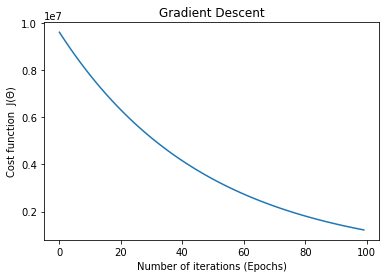

In [94]:
# visualize how our cost decreases over time
plt.plot(np.arange(len(cost_history_list)), cost_history_list)
plt.xlabel("Number of iterations (Epochs)")
plt.ylabel("Cost function  J(Θ)")
plt.title("Gradient Descent")
plt.show()